# HGPR Calculations

This notebook details the calculations of several parameters of the High pressure grinding roller (HGPR). 

Calculated in this notebook are  
- Press forces
- The working Gap
- Throughput 
- Energy Requirements

### Force on the rams

Calculation of the grinding force is based on the Metso HRC 800 specific press force of 4.5N/mm^2. 
This is calculated using the formula derived by ThyssenKrupp Polysius; 

\begin{gather*}
F_{sp} = \frac{F_{grinding}}{1000.D.L}
\end{gather*}

In [ ]:
Fsp = 4.5 # Nmm^2
BoreA =  200 # mm^2
BoreB = 90 # mm^2
nrams = 2 

Area =  (3.14*(BoreA/2)**2) - (3.14*(BoreB/2)**2)

newton = 1000*0.710*0.610*Fsp
ramforce = newton/nrams
Rampressure =10*((ramforce*1000)/(Area))

print('Total Newton;',round(newton),'kN')
print('Force Per Ram;', round(ramforce), 'kN')
print('Pressure required;', round(Rampressure), 'Bar')


Total Newton; 1949 kN
Force Per Ram; 974 kN
Pressure required; 389 Bar


Applying the maximum specific press force of 4.5 N/mm2 with rollers of 0.61m in length and 0.71m in diameter gives a grinding force of 1949 KN.
This figure can be seen to be in the correct approximate region, as seen with the FLS HPGR of similar dimensions. The force per ram is 974kN at 389 Bar. 

### Grinding Gap

The grinding gap between the two rolls has been detailed at being 2% to 2.5% of the width of the rolls. 

In [ ]:
RollerDiameter = 710 # mm
Grinding_Gap_Min = 0.02*RollerDiameter
Grinding_Gap_Max = 0.025*RollerDiameter

print('Grinding gap is to be set between', round(Grinding_Gap_Min,2), 'mm and',Grinding_Gap_Max,'mm')

Grinding gap is to be set between 14.2 mm and 17.75 mm


## <div style='text-align: center;'> Throughput Calculations </div>

### Throughput

Throughput is calculated from the speed, equating to tons per hour.

\begin{gather*}
M = Roll speed * Gap * Width * Density * 3600
\end{gather*}
where; 
\begin{gather*}
    Rollspeed = \frac{2\pi RPM.r}{60 }
\end{gather*}

We will assume the density of material as being 2.4 tons per meter cubed. 

In [ ]:
import math

RPM = 30 # rpm
RollerWidth_M = 0.61 # m
RollerDiameter_M = 0.71 #m
Lime_Density = 2.4 # tons/m^3

RSpeed = (RPM*(2*math.pi*(RollerDiameter_M/2)))/60    # m/s

#Throughput Calculation
M_Estimate = RollerWidth_M * RSpeed * Grinding_Gap_Max*(10**-3) * 3600 * Lime_Density

print('Throughput is',round(M_Estimate),'tph')
print('Equating to',round(M_Estimate*8),'tpd')



Throughput is 104 tph
Equating to 835 tpd


### Throughput for different RPM's

Outlining the impact that RPM has on the throughput of the material. This is for a fixed gap of 17mm.

In [ ]:
import math

rpm_values = list(range(20, 60))
throughput_valuesR = []

# Loop over RPM values from 25 to 40 inclusive
for RPM in rpm_values:
    RSpeed = (RPM * (2 * 3.14 * (RollerDiameter_M / 2))) / 60  # m/s
    M = RollerWidth_M * RSpeed * Grinding_Gap_Max * (10 ** -3) * 3600 * Lime_Density
    throughput_valuesR.append(M)
    


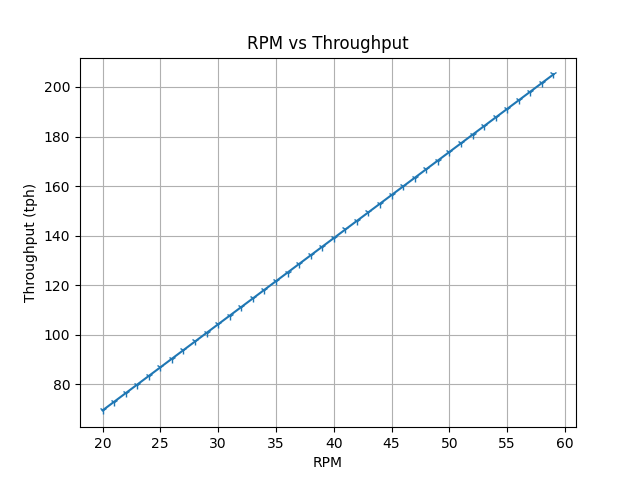

In [ ]:
import matplotlib.pyplot as plt

# Plotting the results
plt.plot(rpm_values, throughput_valuesR, marker='1')
plt.title('RPM vs Throughput')
plt.xlabel('RPM')
plt.ylabel('Throughput (tph)')
plt.grid(True)
plt.show()

### Throughput With Change of Gap

This is a graph of the change of throughput as a function of changing the width of the working gap. 

In [ ]:
Gap_values = list(range(10, 40))
throughput_valuesG = []


RPM = 31 

# Loop over Grinding_Gap values from 30 to 49 inclusive
for Grinding_Gap in Gap_values:
    RSpeed = (RPM * (2 * 3.14 * (RollerDiameter_M / 2))) / 60  # m/s
    M = RollerWidth_M * RSpeed * Grinding_Gap * (10 ** -3) * 3600 * Lime_Density
    throughput_valuesG.append(M)


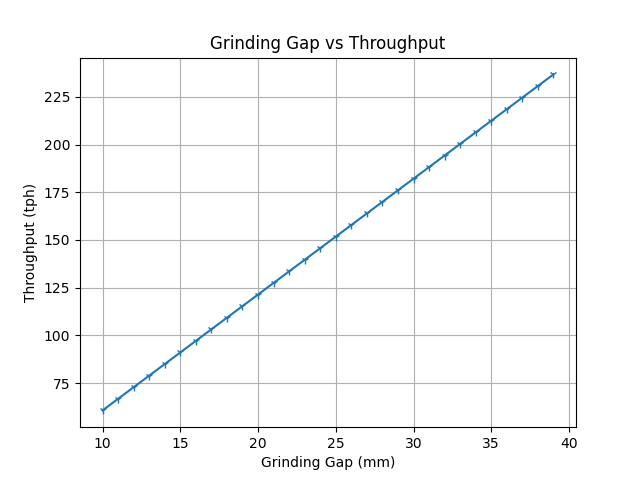

In [ ]:
import matplotlib.pyplot as plt

# Plotting the results
plt.plot(Gap_values, throughput_valuesG, marker='1')
plt.title('Grinding Gap vs Throughput')
plt.xlabel('Grinding Gap (mm)')
plt.ylabel('Throughput (tph)')
plt.grid(True)
plt.show()

### Lowest RPM and Grinding Gap to achieve 100tph

This calculates the minimum RPM to Gap ratio that is required to achieve 100tph.

In [ ]:
RollerWidth_M = 0.61  # m
RollerDiameter_M = 0.71  # m

desired_throughput = 100  # tph

# Control of RPM Range
rpm_range = list(range(20, 50))  

# Control of Gap Range
gap_range = list(range(10, 14)) 

found = False

for RPM in rpm_range:
    for Grinding_Gap in gap_range:
        RSpeed = (RPM * (2 * 3.14 * (RollerDiameter_M / 2))) / 60  # m/s
        M = RollerWidth_M * RSpeed * Grinding_Gap * (10 ** -3) * 3600 * Lime_Density
        
        if M >= desired_throughput:
            print(f"Lowest RPM: {RPM}, Smallest Gap: {Grinding_Gap}mm to achieve {M:.2f} tph")
            found = True
            break

    if found:
        break

if not found:
    print("Couldn't achieve the desired throughput with the provided ranges.")


Lowest RPM: 40, Smallest Gap: 13mm to achieve 101.83 tph


## <div style='text-align: center;'> Energy Calculations </div>

### Energy Consumption (Rough estimate)

It is unknown if the motor will be running at full power consumption, which is 200kW.

\begin{gather*}
kW/ton= 
\frac{Total Throughput (tons)}{Total Power Consumption (kW)}
\end{gather*}

 

In [ ]:

# Example usage:
motor_power_kw = 200*(0.8)  # Motor power in kW working at 80%
Calculated_throughput = M_Estimate # Desired throughput in tons.

# Calculation of KW per ton

energy = (motor_power_kw*2) / (Calculated_throughput)

print(f"Estimated 80% energy consumption: {round(energy,1)}kW per ton.")
print(f"Equating to {round(energy*M_Estimate,1)}kW per hour.")


Estimated 80% energy consumption: 3.1kW per ton.
Equating to 320.0kW per hour.


### Energy Consumption From Bond Work Index 

Calculating the energy required for breaking the stone through the bond index. The Bond work index is a non dimensional laboratory defined number for the energy required for the comminution of a specific rock. Literature has shown limestone to have a Bond index value of 12.5
\begin{gather*}
E = 10WI(\frac{1}{P_{80}^{0.5}} - \frac{1}{F_{80}^{0.5}})
\end{gather*}

P_{80} is the dimension of 80% of the material passing through the rollers. 
F_{80} is the dimension of 80% of the material after being processed through the rollers.

Note this value does not include the idle power draw of the motor etc. 

In [ ]:
BWI = 12.5
F80 = 35*10**3
P80 = 3.5 *10**3

EWI = 10*BWI*((1/(P80**0.5))-(1/(F80**0.5)))

print('Estimated Energy consumtion is',EWI,'Kilowatts per ton.')

Estimated Energy consumtion is 1.4447325320402307 Kilowatts per ton.
